<a href="https://colab.research.google.com/github/Jeevinee/CodSoft/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv("/content/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132784 entries, 0 to 132783
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    132784 non-null  int64  
 1   V1      132784 non-null  float64
 2   V2      132784 non-null  float64
 3   V3      132784 non-null  float64
 4   V4      132784 non-null  float64
 5   V5      132784 non-null  float64
 6   V6      132784 non-null  float64
 7   V7      132784 non-null  float64
 8   V8      132784 non-null  float64
 9   V9      132784 non-null  float64
 10  V10     132784 non-null  float64
 11  V11     132784 non-null  float64
 12  V12     132784 non-null  float64
 13  V13     132784 non-null  float64
 14  V14     132784 non-null  float64
 15  V15     132784 non-null  float64
 16  V16     132784 non-null  float64
 17  V17     132784 non-null  float64
 18  V18     132784 non-null  float64
 19  V19     132784 non-null  float64
 20  V20     132784 non-null  float64
 21  V21     13

In [7]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum()
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

In [8]:
summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Time,int64,0,0.000000,57206,132784,0.000000,80110.000000,50235.524581
V1,float64,0,0.000000,128815,132784,-56.407510,1.960497,-0.244860
V2,float64,0,0.000000,128815,132784,-72.715728,18.902453,0.002637
V3,float64,0,0.000000,128815,132784,-33.680984,9.382558,0.677243
V4,float64,0,0.000000,128815,132784,-5.519697,16.715537,0.141818
V5,float64,0,0.000000,128815,132784,-42.147898,34.801666,-0.285513
V6,float64,0,0.000000,128815,132784,-26.160506,22.529298,0.079162
V7,float64,0,0.000000,128815,132784,-31.764946,36.677268,-0.117917
V8,float64,0,0.000000,128815,132784,-73.216718,20.007208,0.062417
V9,float64,0,0.000000,128815,132784,-9.283925,15.594995,-0.085080


In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [10]:
df.duplicated().sum()

495

<Axes: >

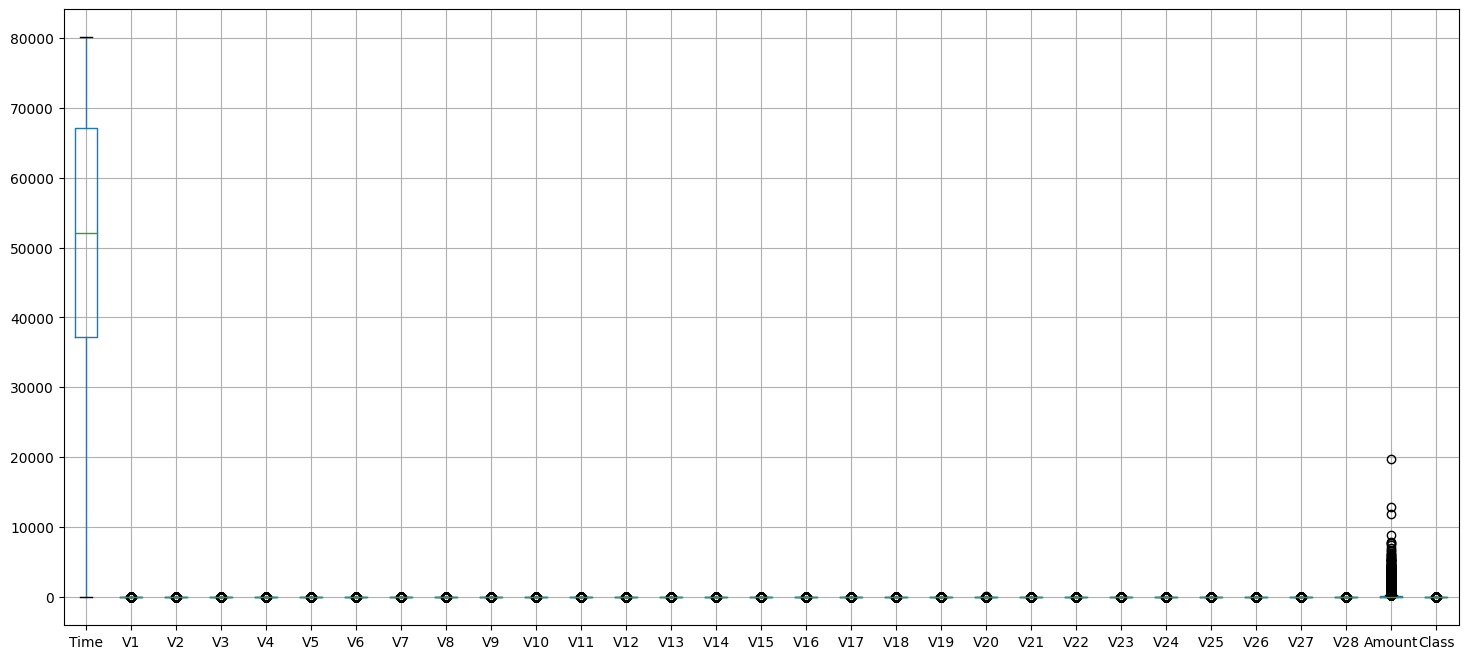

In [11]:
plt.figure(figsize=(18,8))
df.boxplot()

<Axes: ylabel='Amount'>

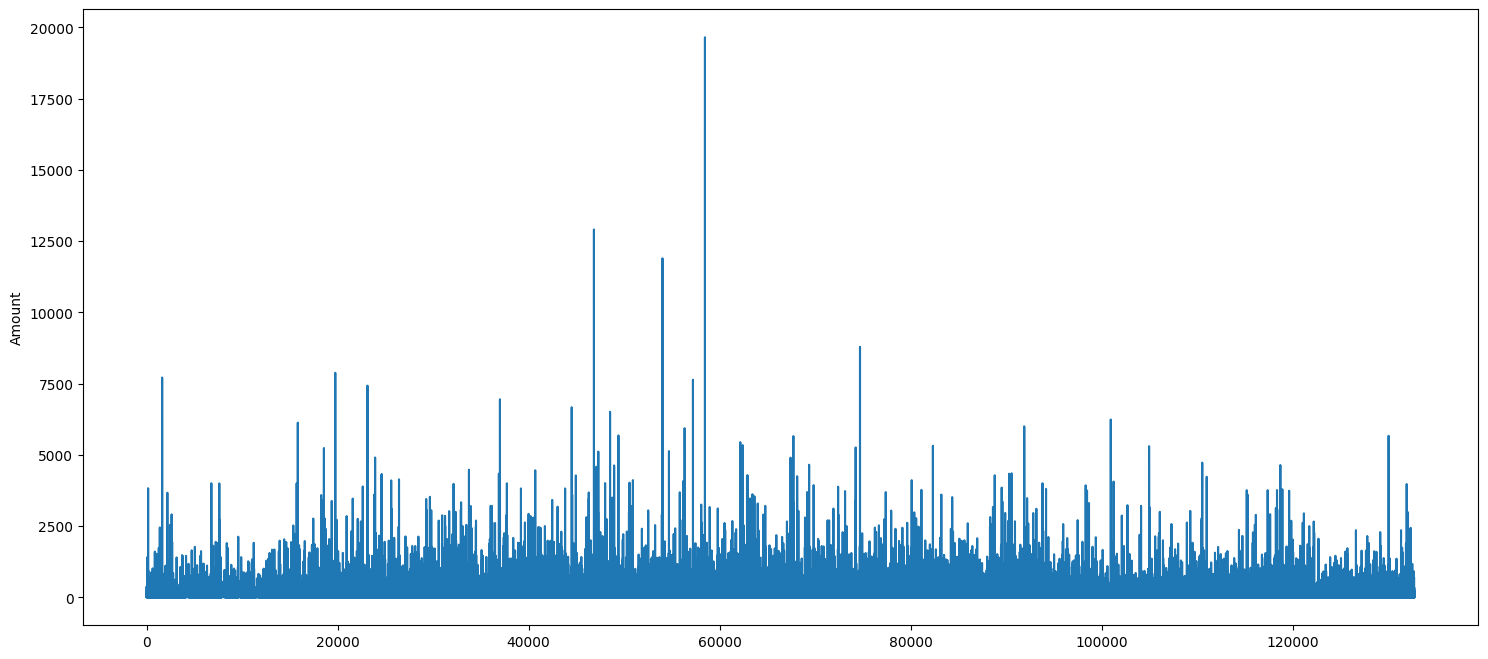

In [12]:
plt.figure(figsize=(18,8))
sns.lineplot(df['Amount'])

<Axes: xlabel='Class', ylabel='count'>

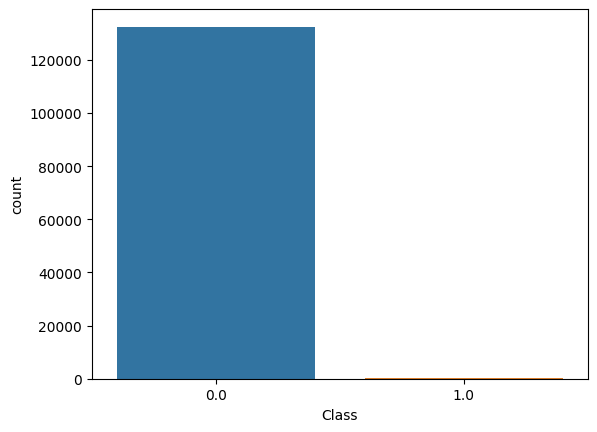

In [13]:
sns.countplot(x=df["Class"])

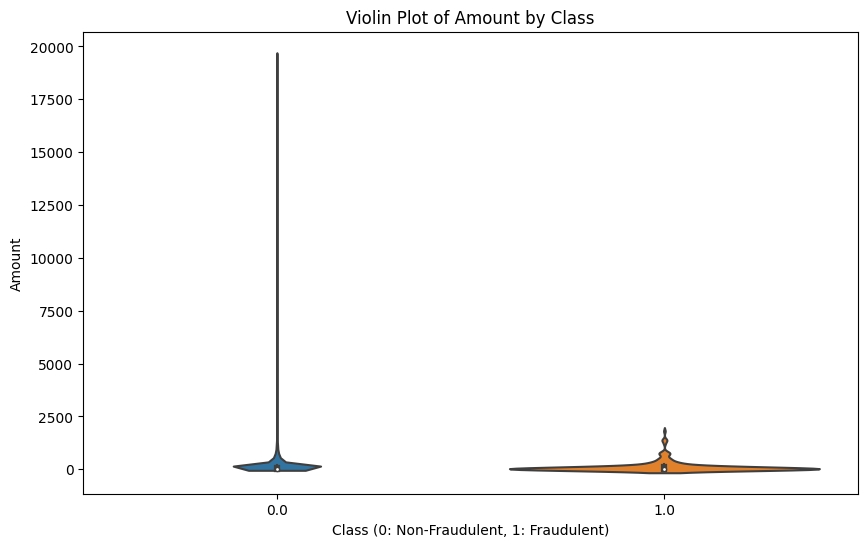

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Amount', data=df)
plt.title('Violin Plot of Amount by Class')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Amount')
plt.show()

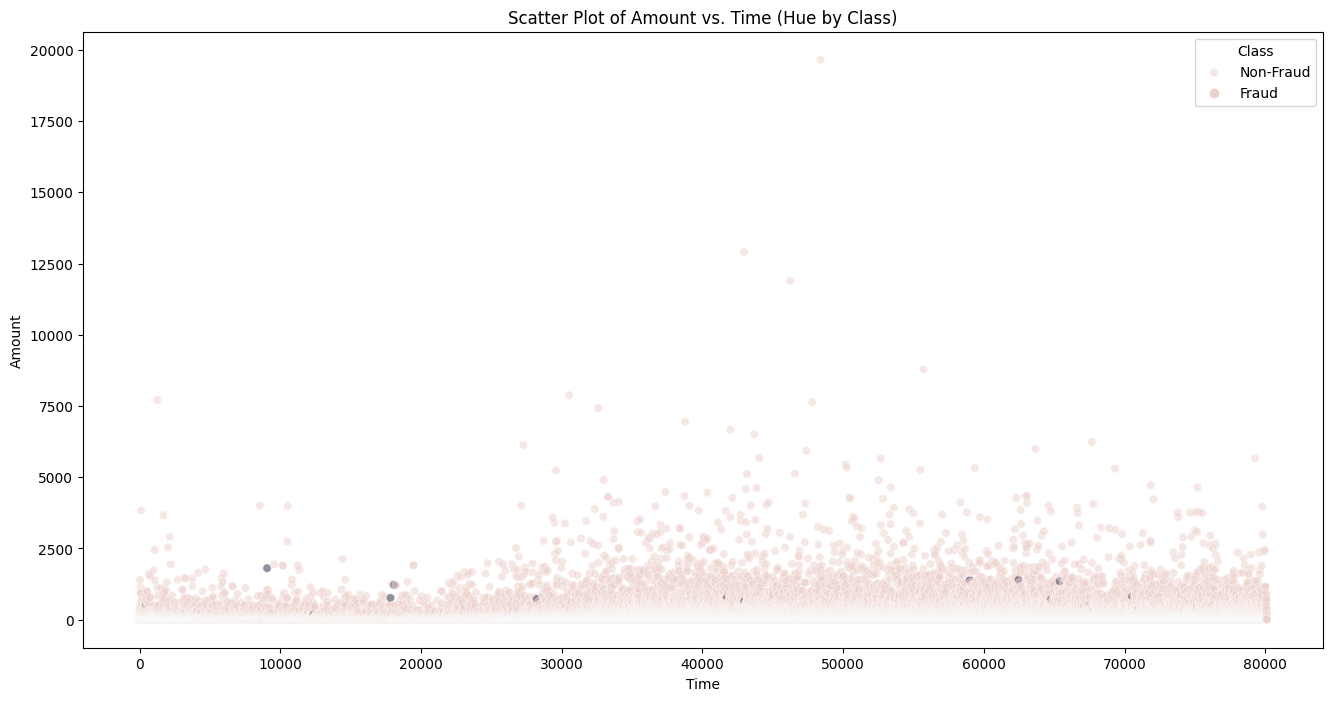

In [15]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x="Time", y="Amount", hue="Class", data=df, alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Amount")
plt.title("Scatter Plot of Amount vs. Time (Hue by Class)")
plt.legend(title="Class", labels=["Non-Fraud", "Fraud"])
plt.show()

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
cols = df.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<ipython-input-18-3f1d0d8a66fc>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-18-3f1d0d8a66fc>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-18-3f1d0d8a66fc>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seab

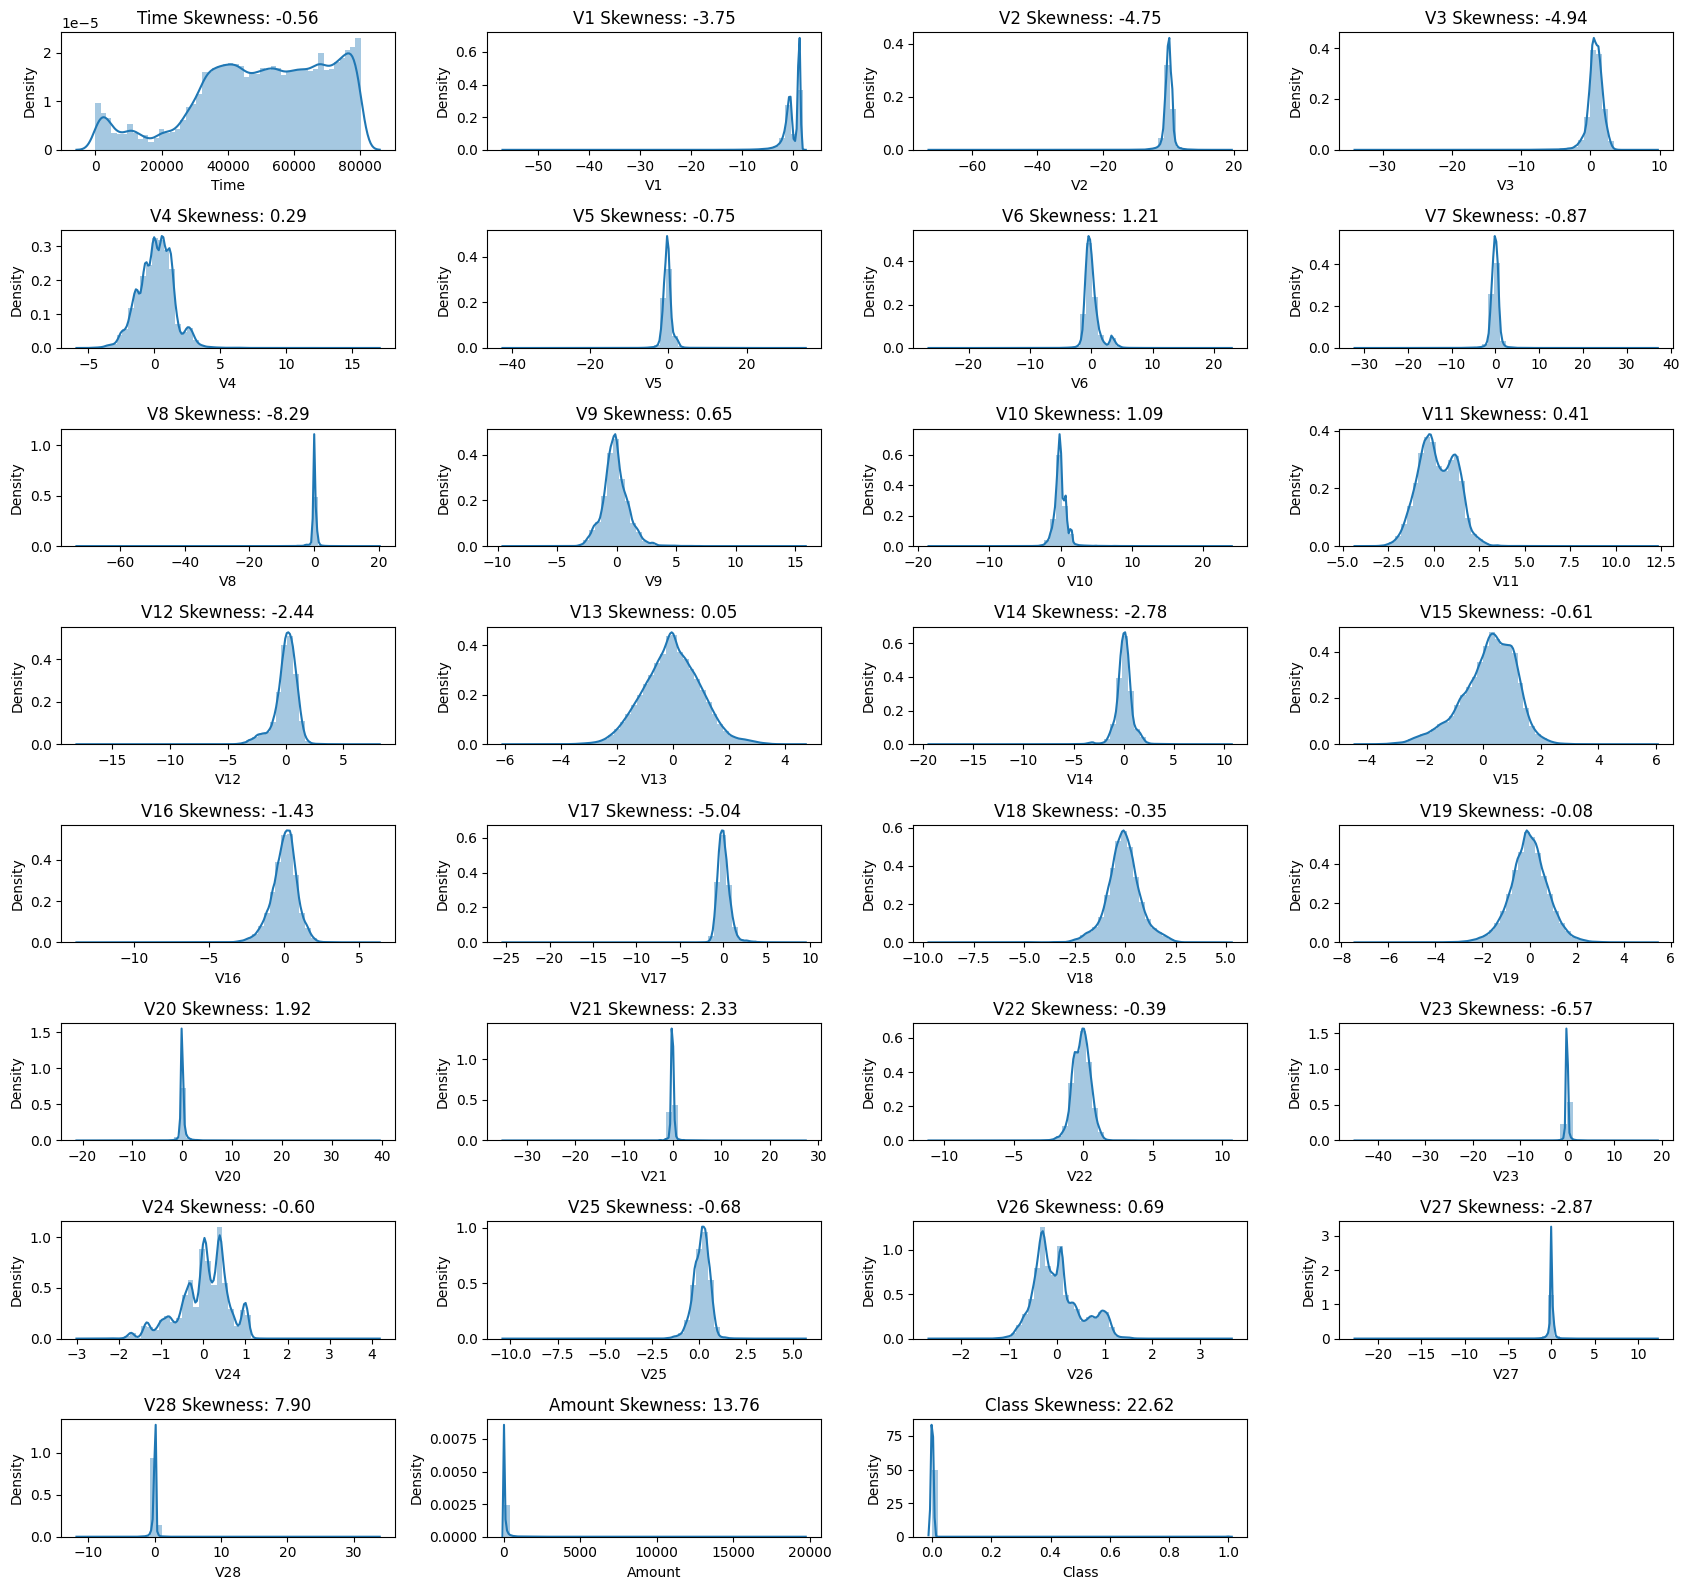

In [18]:
k = 0
num_rows = 8
num_cols = 4

plt.figure(figsize=(17, 2 * num_rows))

for col in cols:
    k += 1
    plt.subplot(num_rows, num_cols, k)
    sns.distplot(df[col])
    plt.title(f'{col} Skewness: {df[col].skew():.2f}')

plt.tight_layout()
plt.show()

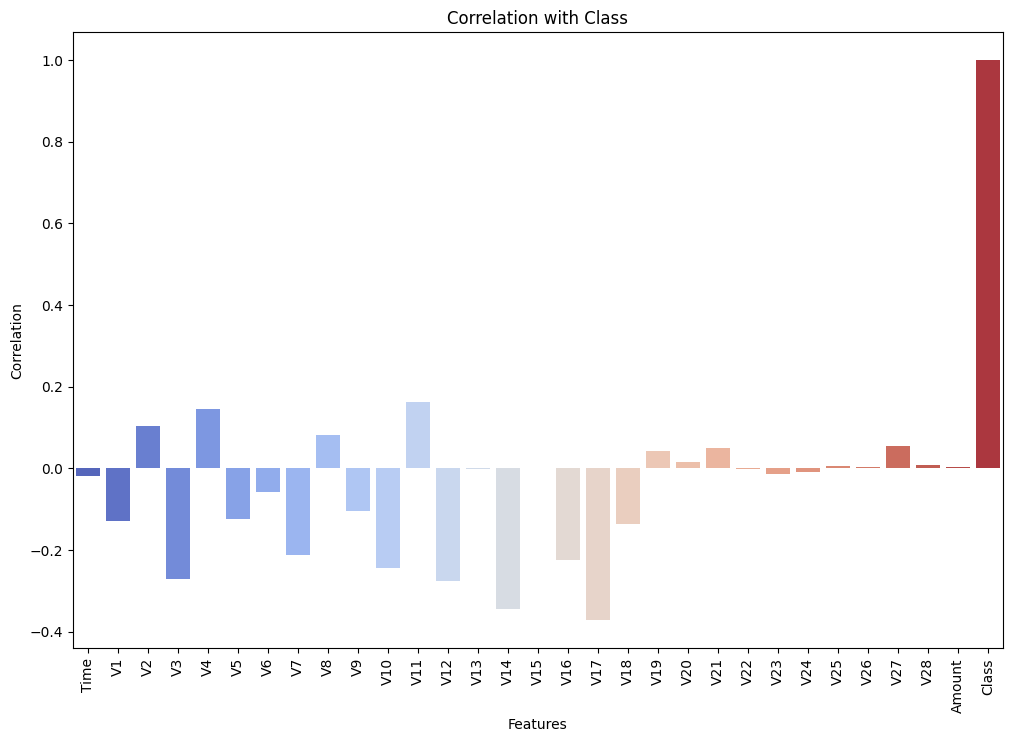

In [19]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix['Class'], palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation with Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [30]:
x = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPool1D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, precision_recall_curve

In [33]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [35]:
model = Sequential([
    Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(30, 1)),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.3),

    Flatten(),

    Dense(units=64, activation='relu'),
    Dropout(0.3),

    Dense(units=1, activation='sigmoid')
])

In [36]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
3308/3308 [==============================] - 18s 5ms/step - loss: 0.0274 - accuracy: 0.9954 - val_loss: nan - val_accuracy: 0.9994
Epoch 2/10
3308/3308 [==============================] - 18s 5ms/step - loss: 0.0080 - accuracy: 0.9987 - val_loss: nan - val_accuracy: 0.9994
Epoch 3/10
3308/3308 [==============================] - 19s 6ms/step - loss: 0.0065 - accuracy: 0.9988 - val_loss: nan - val_accuracy: 0.9995
Epoch 4/10
3308/3308 [==============================] - 15s 5ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: nan - val_accuracy: 0.9994
Epoch 5/10
3308/3308 [==============================] - 13s 4ms/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: nan - val_accuracy: 0.9995


In [38]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

827/827 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.9994
Test Loss: nan
Test Accuracy: 0.9994330406188965


In [39]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

827/827 [==============================] - 1s 1ms/step
